In [1]:
import importlib
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import ndimage

In [2]:
from multi_loc import covariance, assimilate

In [3]:
%matplotlib inline

In [4]:
def imshow(X, title=None, vmin=None, vmax=None, cmap=None):
    plt.figure()
    im = plt.imshow(X, vmin=vmin, vmax=vmax, cmap=cmap)
    plt.colorbar(im)
    plt.title(title)

In [ ]:
this_k = covariance.return_waves(N)

In [135]:
-1 + 4/3

0.33333333333333326

In [142]:
N*dx

1.0

In [145]:
N = 64
dx = 0.5
k = covariance.return_waves(N)
k = k/(N * dx)
k = np.fft.fftshift(k)
# new_k = 2*(np.arange(N))/N - 1
new_k = ((np.arange(N) - N/2)/(N * dx))
print(k)
print(new_k)

[-1.      -0.96875 -0.9375  -0.90625 -0.875   -0.84375 -0.8125  -0.78125
 -0.75    -0.71875 -0.6875  -0.65625 -0.625   -0.59375 -0.5625  -0.53125
 -0.5     -0.46875 -0.4375  -0.40625 -0.375   -0.34375 -0.3125  -0.28125
 -0.25    -0.21875 -0.1875  -0.15625 -0.125   -0.09375 -0.0625  -0.03125
  0.       0.03125  0.0625   0.09375  0.125    0.15625  0.1875   0.21875
  0.25     0.28125  0.3125   0.34375  0.375    0.40625  0.4375   0.46875
  0.5      0.53125  0.5625   0.59375  0.625    0.65625  0.6875   0.71875
  0.75     0.78125  0.8125   0.84375  0.875    0.90625  0.9375   0.96875]
[-1.      -0.96875 -0.9375  -0.90625 -0.875   -0.84375 -0.8125  -0.78125
 -0.75    -0.71875 -0.6875  -0.65625 -0.625   -0.59375 -0.5625  -0.53125
 -0.5     -0.46875 -0.4375  -0.40625 -0.375   -0.34375 -0.3125  -0.28125
 -0.25    -0.21875 -0.1875  -0.15625 -0.125   -0.09375 -0.0625  -0.03125
  0.       0.03125  0.0625   0.09375  0.125    0.15625  0.1875   0.21875
  0.25     0.28125  0.3125   0.34375  0.375    0.4

In [105]:
k

array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8])

In [78]:
dimension = 2**6
rho0 = 20
dx = 1
H = np.eye(dimension)[::2]
y_size = H.shape[0]

rho = np.arange(dimension, dtype=float)
rho = np.minimum(rho, (dimension - rho) % dimension)
rho = rho*dx

In [79]:
eig_val, eig_vec, P = covariance.generate_circulant(
    dimension, dx, rho0, covariance.fft_exp_1d,
    return_Corr = True)
eig_val = eig_val * (eig_val.size/eig_val.sum())
eig_vec = eig_vec.real + eig_vec.imag
P = eig_vec @ np.diag(eig_val) @ eig_vec.conj().T
P = P.real

R = np.eye(y_size)

returned = assimilate.transformation_matrices(
    H, eig_val_p=eig_val, eig_vec_p=eig_vec,
    R=R, return_Ts=True)

P_sqrt, P_inv_sqrt = returned[:2]
R_sqrt, R_inv_sqrt = returned[2:4]
U, S, VT = returned[4:7]
Tx, Tx_inv, Ty, Ty_inv = returned[7:]

/anaconda3/envs/loc/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


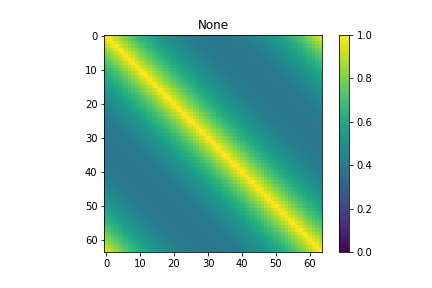

<IPython.core.display.Javascript object>


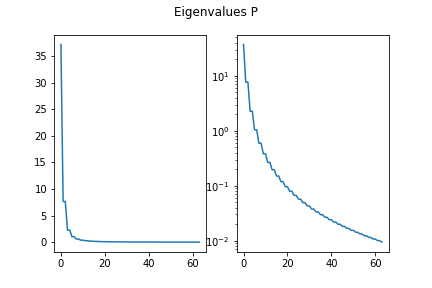

Text(0.5,0.98,'Eigenvalues P')

In [80]:
imshow(P, vmin=0)
fig, ax = plt.subplots(1, 2)
ax[0].plot(eig_val)
ax[1].semilogy(eig_val)
plt.suptitle('Eigenvalues P')

In [94]:
%matplotlib inline

/anaconda3/envs/loc/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


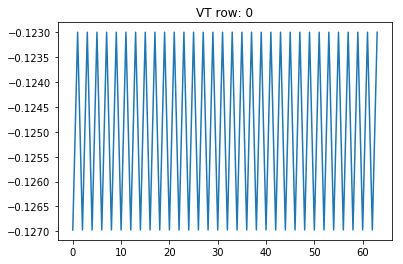

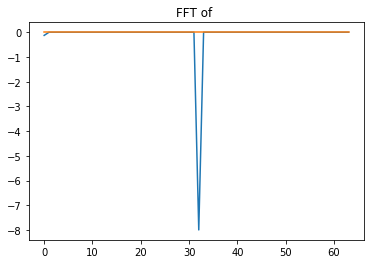

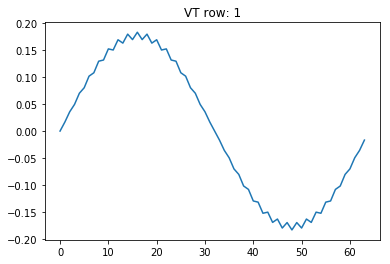

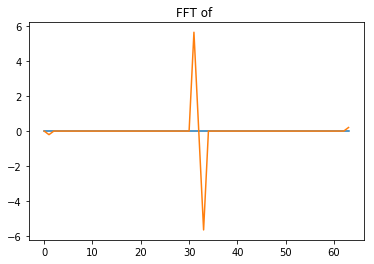

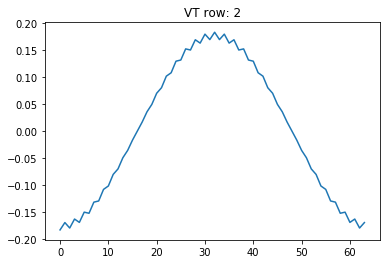

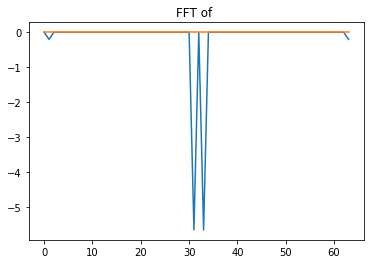

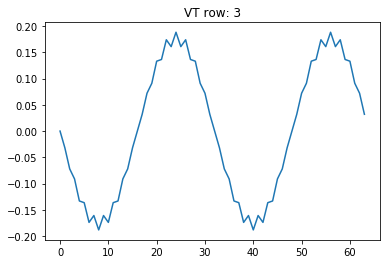

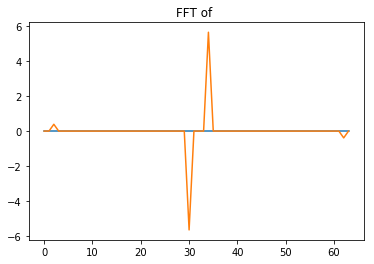

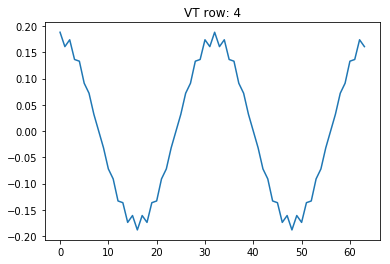

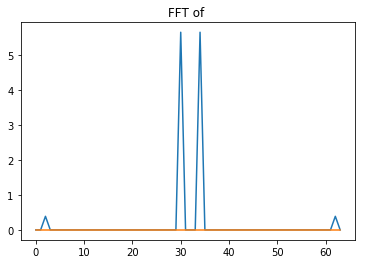

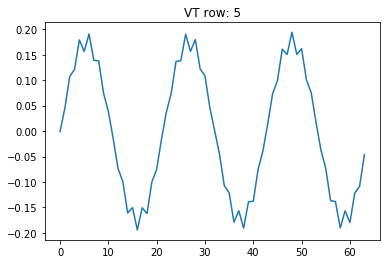

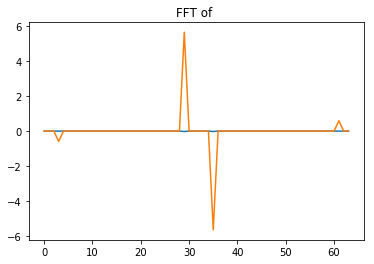

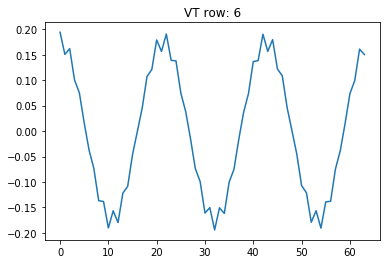

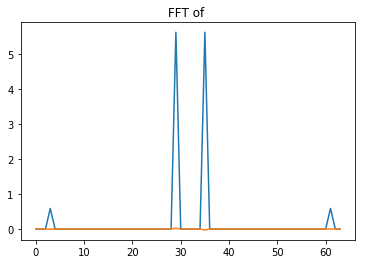

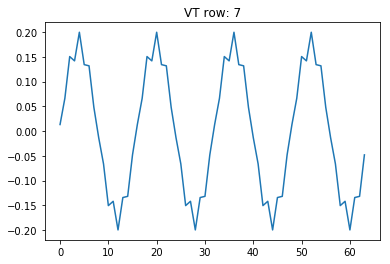

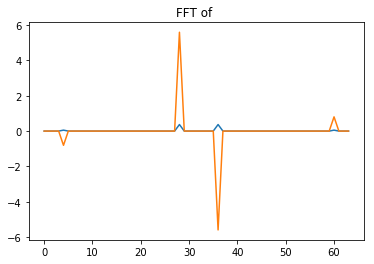

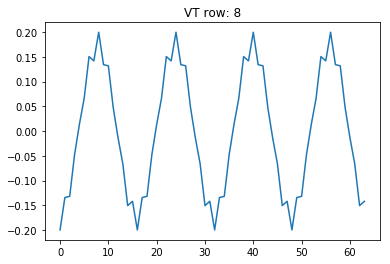

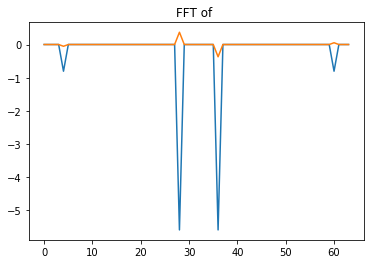

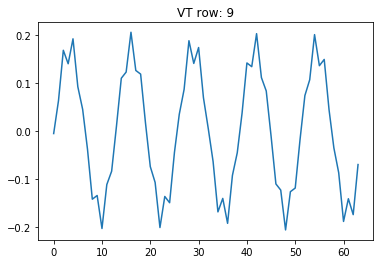

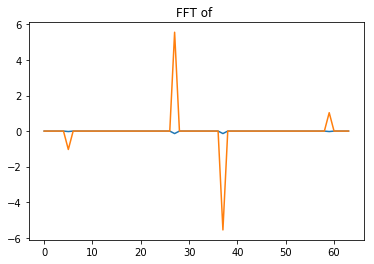

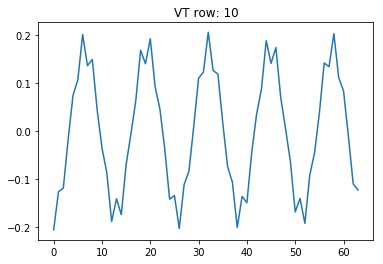

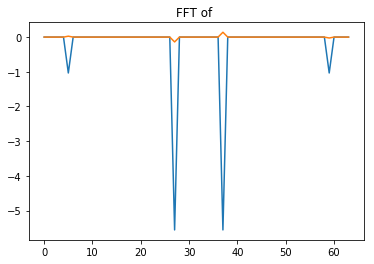

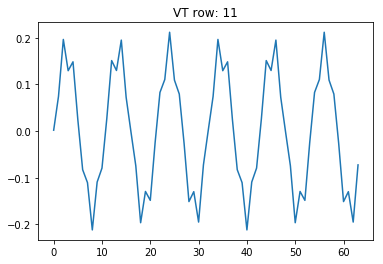

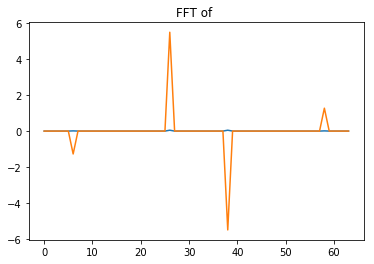

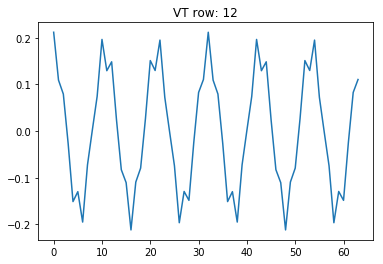

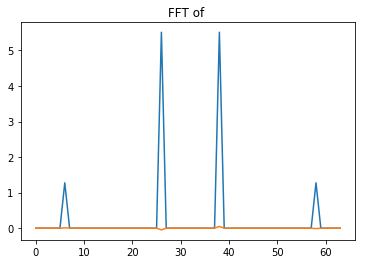

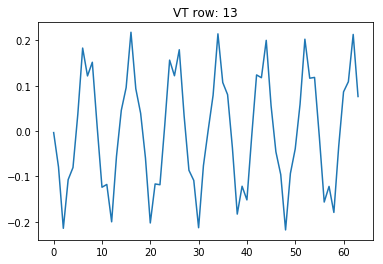

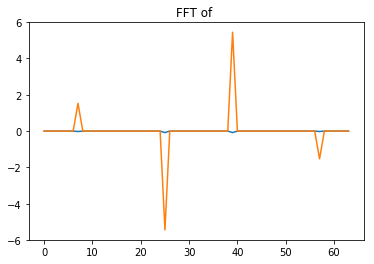

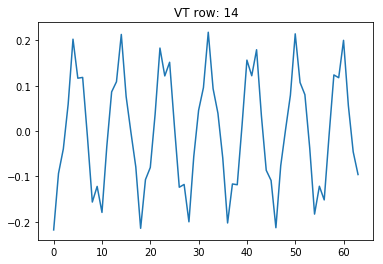

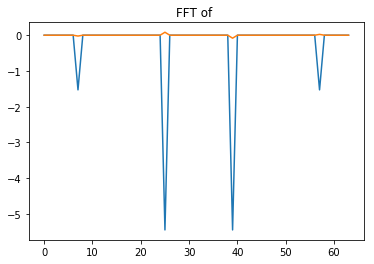

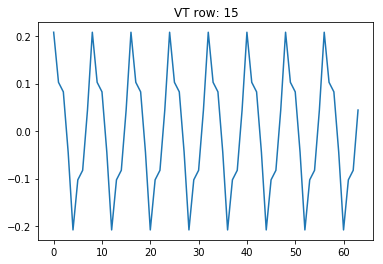

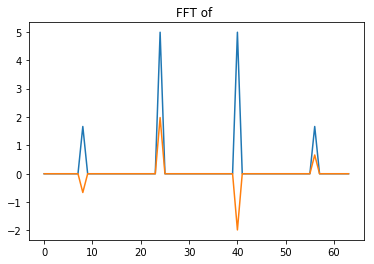

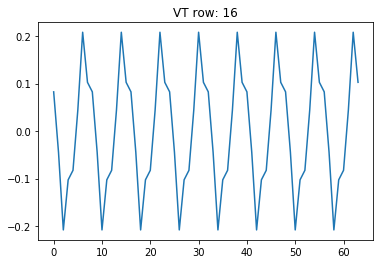

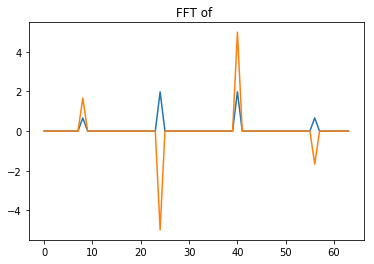

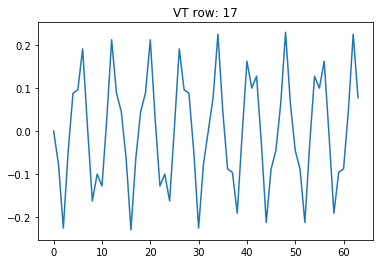

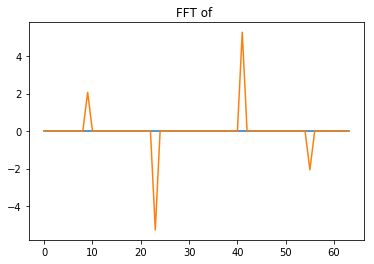

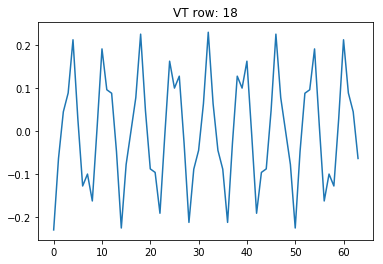

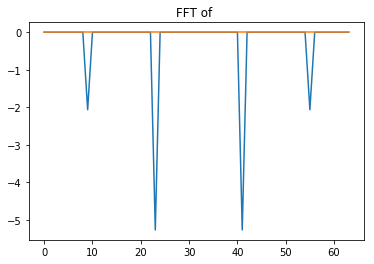

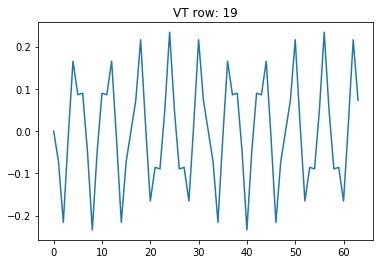

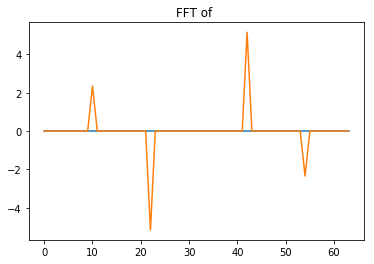

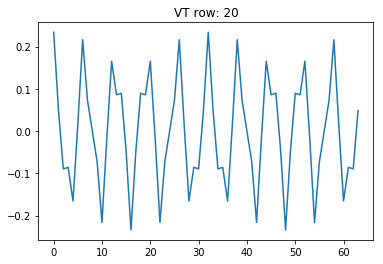

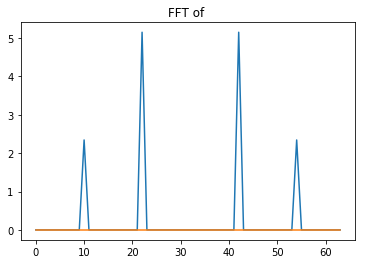

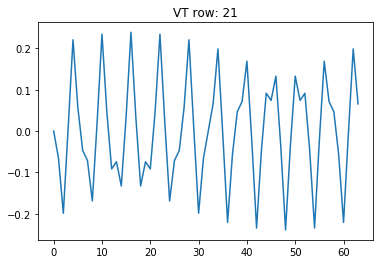

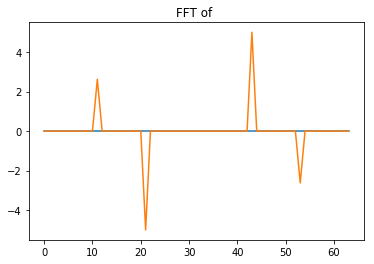

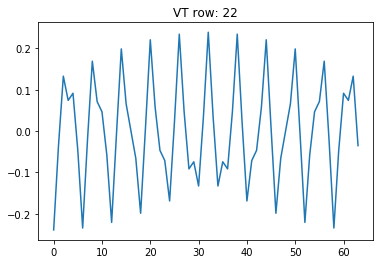

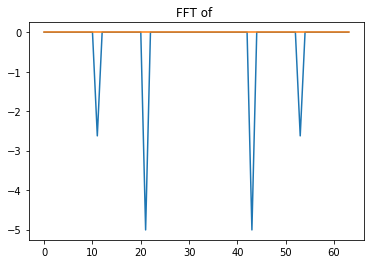

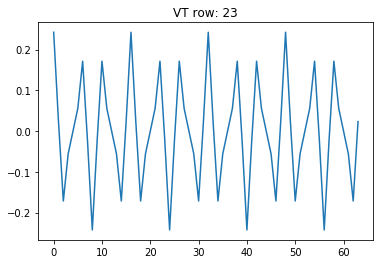

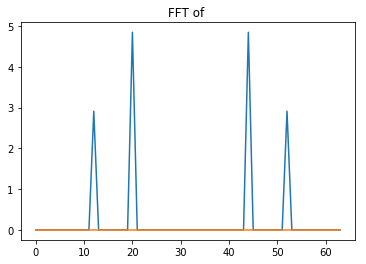

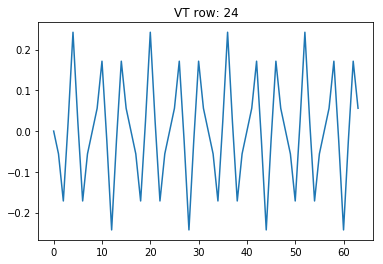

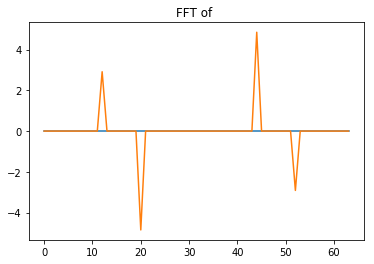

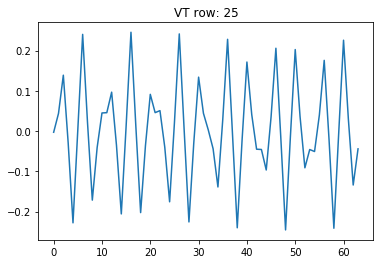

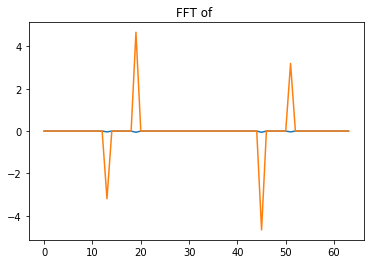

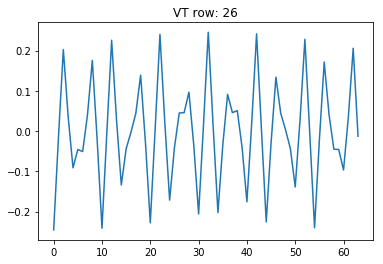

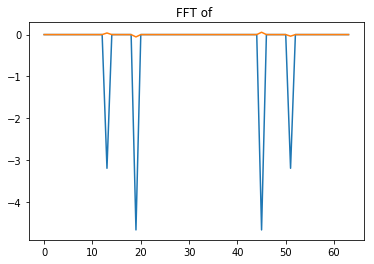

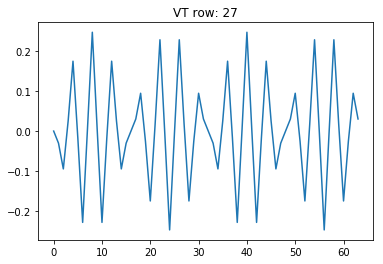

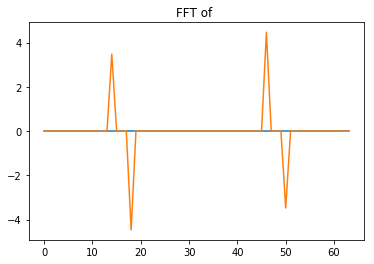

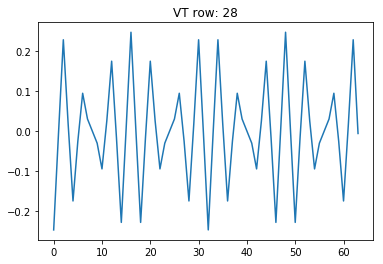

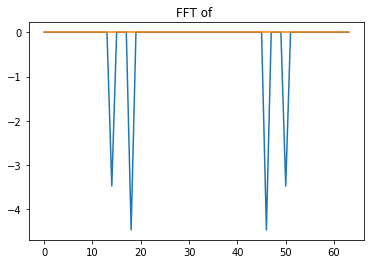

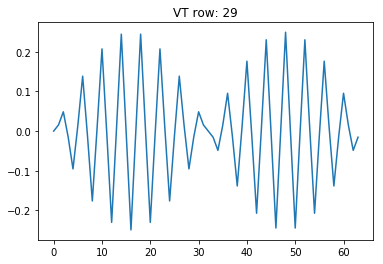

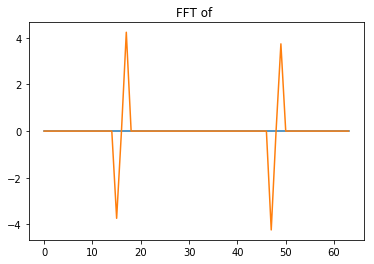

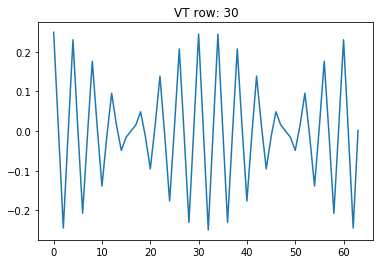

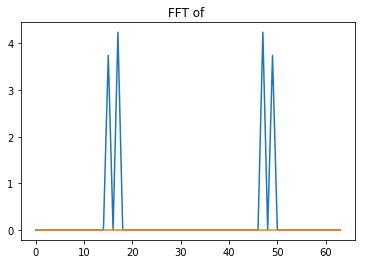

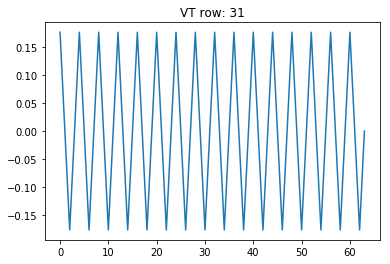

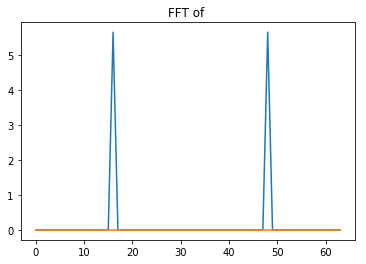

In [95]:
# imshow(U, 'U')

# for ii in range(U.shape[1]):   
#     plt.figure()
#     plt.plot(U[:, ii])
#     plt.title(f'column: {ii}')
    
#     u_fft = np.fft.fft(U[:, ii])
#     plt.figure()
#     plt.plot(u_fft.real)
#     plt.plot(u_fft.imag)
#     plt.title(f'VT row: {ii}')
    
# imshow(VT, 'VT')

for ii in range(round(VT.shape[0]/2)):
    x = np.arange(dimension)/dimension*2*np.pi
    truth = np.cos(x*ii)
    
    plt.figure()
    plt.plot(VT[ii])
    plt.title(f'VT row: {ii}')
    
    v_fft = np.fft.fft(VT[ii])
    v_fft = np.fft.fftshift(v_fft)
    plt.figure()
    plt.plot(v_fft.real)
    plt.plot(v_fft.imag)
    plt.title(f'FFT of ')

In [187]:
%matplotlib inline

In [188]:
dimension = 100
rho0 = 10
dx = 1
H = np.eye(dimension)[::2]
y_size = H.shape[0]

rho = np.arange(dimension, dtype=float)
rho = np.minimum(rho, (dimension - rho) % dimension)
rho = rho*dx

In [190]:
eig_val, eig_vec, P = covariance.generate_circulant(
    dimension, dx, rho0, covariance.fft_sqd_exp_1d,
    return_Corr = True)
eig_val = eig_val * (eig_val.size/eig_val.sum())
eig_vec = eig_vec.real + eig_vec.imag
P = eig_vec @ np.diag(eig_val) @ eig_vec.conj().T
P = P.real

R = np.eye(y_size)

returned = assimilate.transformation_matrices(
    H, eig_val_p=eig_val, eig_vec_p=eig_vec,
    R=R, return_Ts=True)

P_sqrt, P_inv_sqrt = returned[:2]
R_sqrt, R_inv_sqrt = returned[2:4]
U, S, VT = returned[4:7]
Tx, Tx_inv, Ty, Ty_inv = returned[7:]

Text(0.5,0.98,'Eigenvalues P')

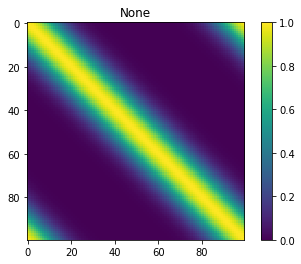

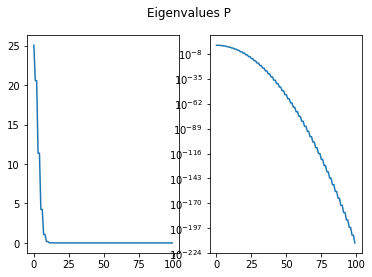

In [192]:
imshow(P, vmin=0)

fig, ax = plt.subplots(1, 2)
ax[0].plot(eig_val)
ax[1].semilogy(eig_val)
plt.suptitle('Eigenvalues P')

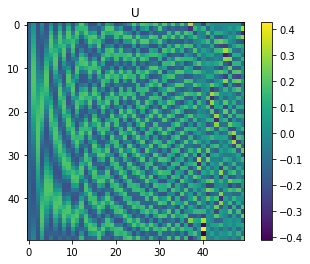

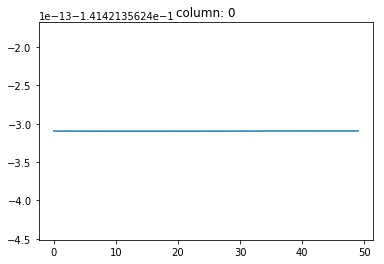

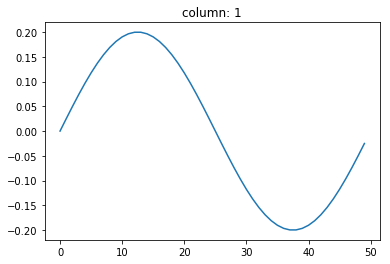

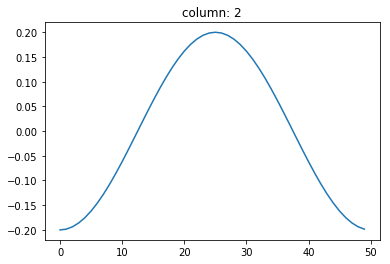

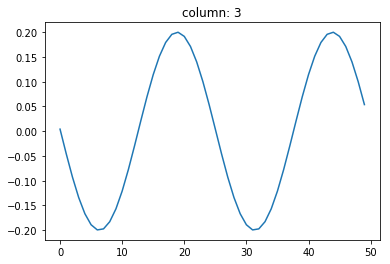

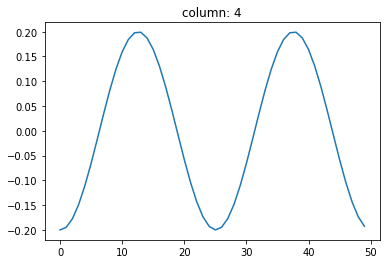

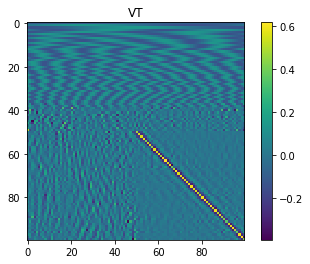

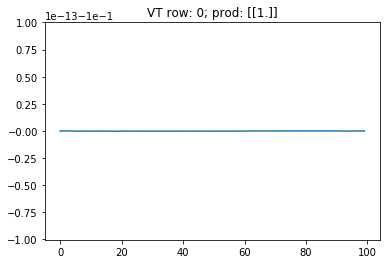

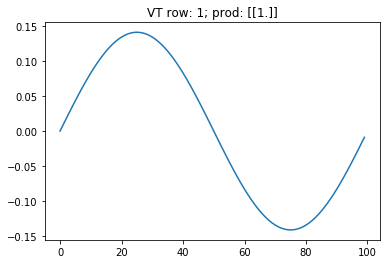

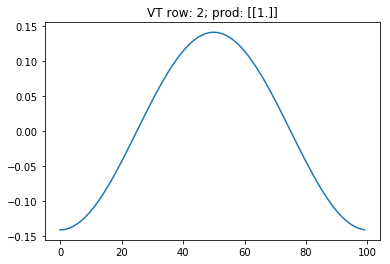

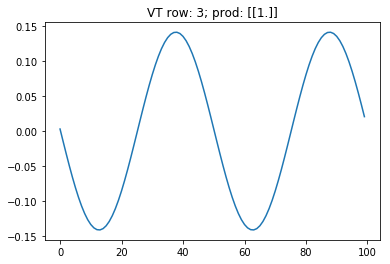

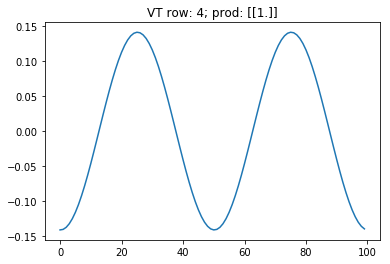

In [193]:
imshow(U, 'U')

for ii in range(5):   
    plt.figure()
    plt.plot(U[:, ii])
    plt.title(f'column: {ii}')
    
imshow(VT, 'VT')

for ii in range(5):
    x = np.arange(dimension)/dimension*2*np.pi
    truth = np.cos(x*ii)
    prod = VT[ii][None, :] @ VT[ii][None, :].conj().T
    plt.figure()
    plt.plot(VT[ii])
    plt.title(f'VT row: {ii}; prod: {prod}')

/anaconda3/envs/loc/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


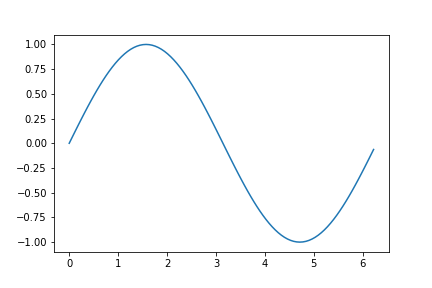

<IPython.core.display.Javascript object>


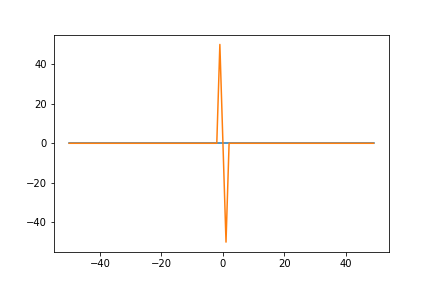

In [48]:
N = 100
x = np.arange(100)*2*np.pi/N
sin = np.sin(x)
fft = np.fft.fft(sin)
fft = np.fft.fftshift(fft)
k = np.arange(-N/2, N/2)

plt.figure()
plt.plot(x, sin)

plt.figure()
plt.plot(k, fft.real)
plt.plot(k, fft.imag)